## Step 1: Importing Libraries and Data

In [1]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
#Set option to display max 100 columns & 500 rows
pd.set_option('display.max_columns', 100)
pd.set_option("display.max_rows", 500)

In [3]:
# Reading the dataset
df_leads = pd.read_csv("Leads.csv")

In [4]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df_leads.shape

(9240, 37)

## Step 2: Data Understanding and Inspection

In [6]:
# Checking spread of data
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# checking number of unique values in each column
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
# Check data types of columns and nulls
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are **`null values`** in the dataframe

In [9]:
#Checking for count of missing values in each column
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

There are a few columns with quite a high number of missing/null values in the dataframe. We will handle them in data cleaning / data imputation step

In [10]:
# Check for duplicate rows
print(df_leads.duplicated().sum())

0


There are no duplicates in the dataframe df_leads.

## Step 3: Data Cleaning

### Treatment for 'Select' values
As mentioned in the Problem Statement, many of the categorical variables have a level called **`'Select'`** which needs to be handled because it is as good as a null value. One of the reason might be is that the customer did not select any option from the list and hence for such columns the data remained as default 'Select' for Select. 

In [11]:
# List of columns having 'Select' as value

cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [12]:
# Converting 'Select' values to NaN.
df_leads = df_leads.replace('Select', np.nan)

In [13]:
# Checking again
cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


Now, there are no `'Select'` values in the dataframe df_leads.

### Handling Missing Values

In [14]:
# Calculating Missing Values Percentage

100*(df_leads.isna().mean()).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

#### Drop Columns with more than 40% Null Values

In [15]:
missing_perc = 100*(df_leads.isna().mean()).sort_values(ascending=False)
col_to_drop = missing_perc[missing_perc>=40].index.to_list()
print("Columns dropped : " , col_to_drop,"\n")
print("Shape before dropping columns: ",df_leads.shape)
df_leads.drop(labels=col_to_drop,axis=1, inplace=True)
print("Shape after dropping columns: ",df_leads.shape)

Columns dropped :  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'] 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 30)


In [16]:
100*(df_leads.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [17]:
# Checking Categorical Columns to handle
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*df_leads[i].value_counts(normalize=True, dropna= False)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")

value_counts % for : City 

City
NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Specialization
NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970

#### Insights:
- City: City has 39.71 % missing values. Imputing missing values with Mumbai will make the data more skewed. Skewness will later cause bias in the model. Hence `City column can be dropped`. 

- Specialization: Specialization has 36.58 % missing values. The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. We need to create additional category called `'Others'`. 

- Tags: Tags has 36.29 % missing values. Tags are assigned to customers indicating the current status of the lead. Since this is current status, this column will `not be useful for modeling`. Hence it can be `dropped`.

- What matters most to you in choosing a course: This variable has 29.32 % missing values. 99.95% customers have selected 'better career prospects'. This is massively skewed and will `not provide any insight`. Hence it can be `dropped`.

- What is your current occupation: We can impute the missing values with `'NA'` as imputing as unemployed will further skew already skewed data. This seems to be a important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed. 

- Country: X Education sells online courses and appx 70% of the customers are from India. Does not make business sense right now to impute missing values with India. Hence `Country column can be dropped.

- Last Activity: `"Email Opened"` is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with label `'Email Opened'`.

- Lead Source: `"Google"` is having highest number of occurences and overall nulls in this column is just 0.39%, hence we will impute the missing values with label 'Google'. Also it has another value 'google' which is basically the same as 'Google'

Dropping the following columns
- 'City',
- 'Tags',
- 'Country',
- 'What matters most to you in choosing a course'

In [18]:
# Dropping Columns
print("Before Drop",df_leads.shape)
df_leads.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Drop",df_leads.shape)

Before Drop (9240, 30)
After Drop (9240, 26)


Imputing the following columns
- 'Specialization',
- 'Lead Source',
- 'Last Activity', 
- 'What is your current occupation'

In [19]:
# Imputing values as per the above observations/insights

missing_values={'Specialization':'NA','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'NA'}
df_leads=df_leads.fillna(value=missing_values)

In [20]:
df_leads['Lead Source']=np.where(df_leads['Lead Source']=="google","Google",df_leads['Lead Source'])

In [21]:
# Re Checking the percentage of null values for remaining columns

round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

In [22]:
# Checking Numerical Columns to handle
# TotalVisits
print("TotalVisits - Value Counts")
print("----------------------------------------")
df_leads.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts
----------------------------------------


TotalVisits
0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64

Missing values in 'TotalVisits' can be imputed with `median`.

In [23]:
df_leads['TotalVisits'].median()

3.0

In [24]:
df_leads['TotalVisits'].mode()

0    0.0
Name: TotalVisits, dtype: float64

In [25]:
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].median(), inplace=True)

In [26]:
# Page Views Per Visit
print("Page Views Per Visit - Value Counts")
print("----------------------------------------")
df_leads.TotalVisits.value_counts().head(10)

Page Views Per Visit - Value Counts
----------------------------------------


TotalVisits
0.0    2189
2.0    1680
3.0    1443
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64

Missing values in 'Page Views Per Visit' can be imputed with `median`.

In [27]:
df_leads['Page Views Per Visit'].median()

2.0

In [28]:
df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].median(), inplace=True)

In [29]:
# Re Checking null values after handling categorical and numerical columns
df_leads.isna().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content 

### Removing Unwanted Columns

#### Handling columns with only one unique value

In [30]:
#check for columns with one unique value, count and freq is same

df_leads.describe(include = 'object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,5,20,2,2,17,19,7,2,1,2,2,2,2,2,1,1,1,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,NA,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
freq,1,4886,2909,8506,9238,3540,3380,5600,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407


NOTE: Following columns have only **`one unique value`**: 
- 'I agree to pay the amount through cheque', 
- 'Get updates on DM Content', 
- 'Update me on Supply Chain Content', 
- 'Receive More Updates About Our Courses', 
- 'Magazine'

These columns are of no use as they have **only one category of response** from customer and can be dropped.

In [31]:
# List of columns with one unique value, we will drop these columns
cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

print("Before Dropping Columns",df_leads.shape)
df_leads.drop(cols_to_drop, axis = 1, inplace = True)
print("After Dropping Columns",df_leads.shape)

Before Dropping Columns (9240, 26)
After Dropping Columns (9240, 21)


#### Dropping columns of no use for modeling
Columns:
- 'Prospect ID',
- 'Lead Number',
- 'Last Notable Activity' 
 
Above columns do not add any value to the model. Dropping these columns to remove unnecessary data.

In [32]:
# Dropping Columns
print("Before Dropping Columns",df_leads.shape)
df_leads.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",df_leads.shape)

Before Dropping Columns (9240, 21)
After Dropping Columns (9240, 18)


### Checking & Dropping Category Columns that are Skewed

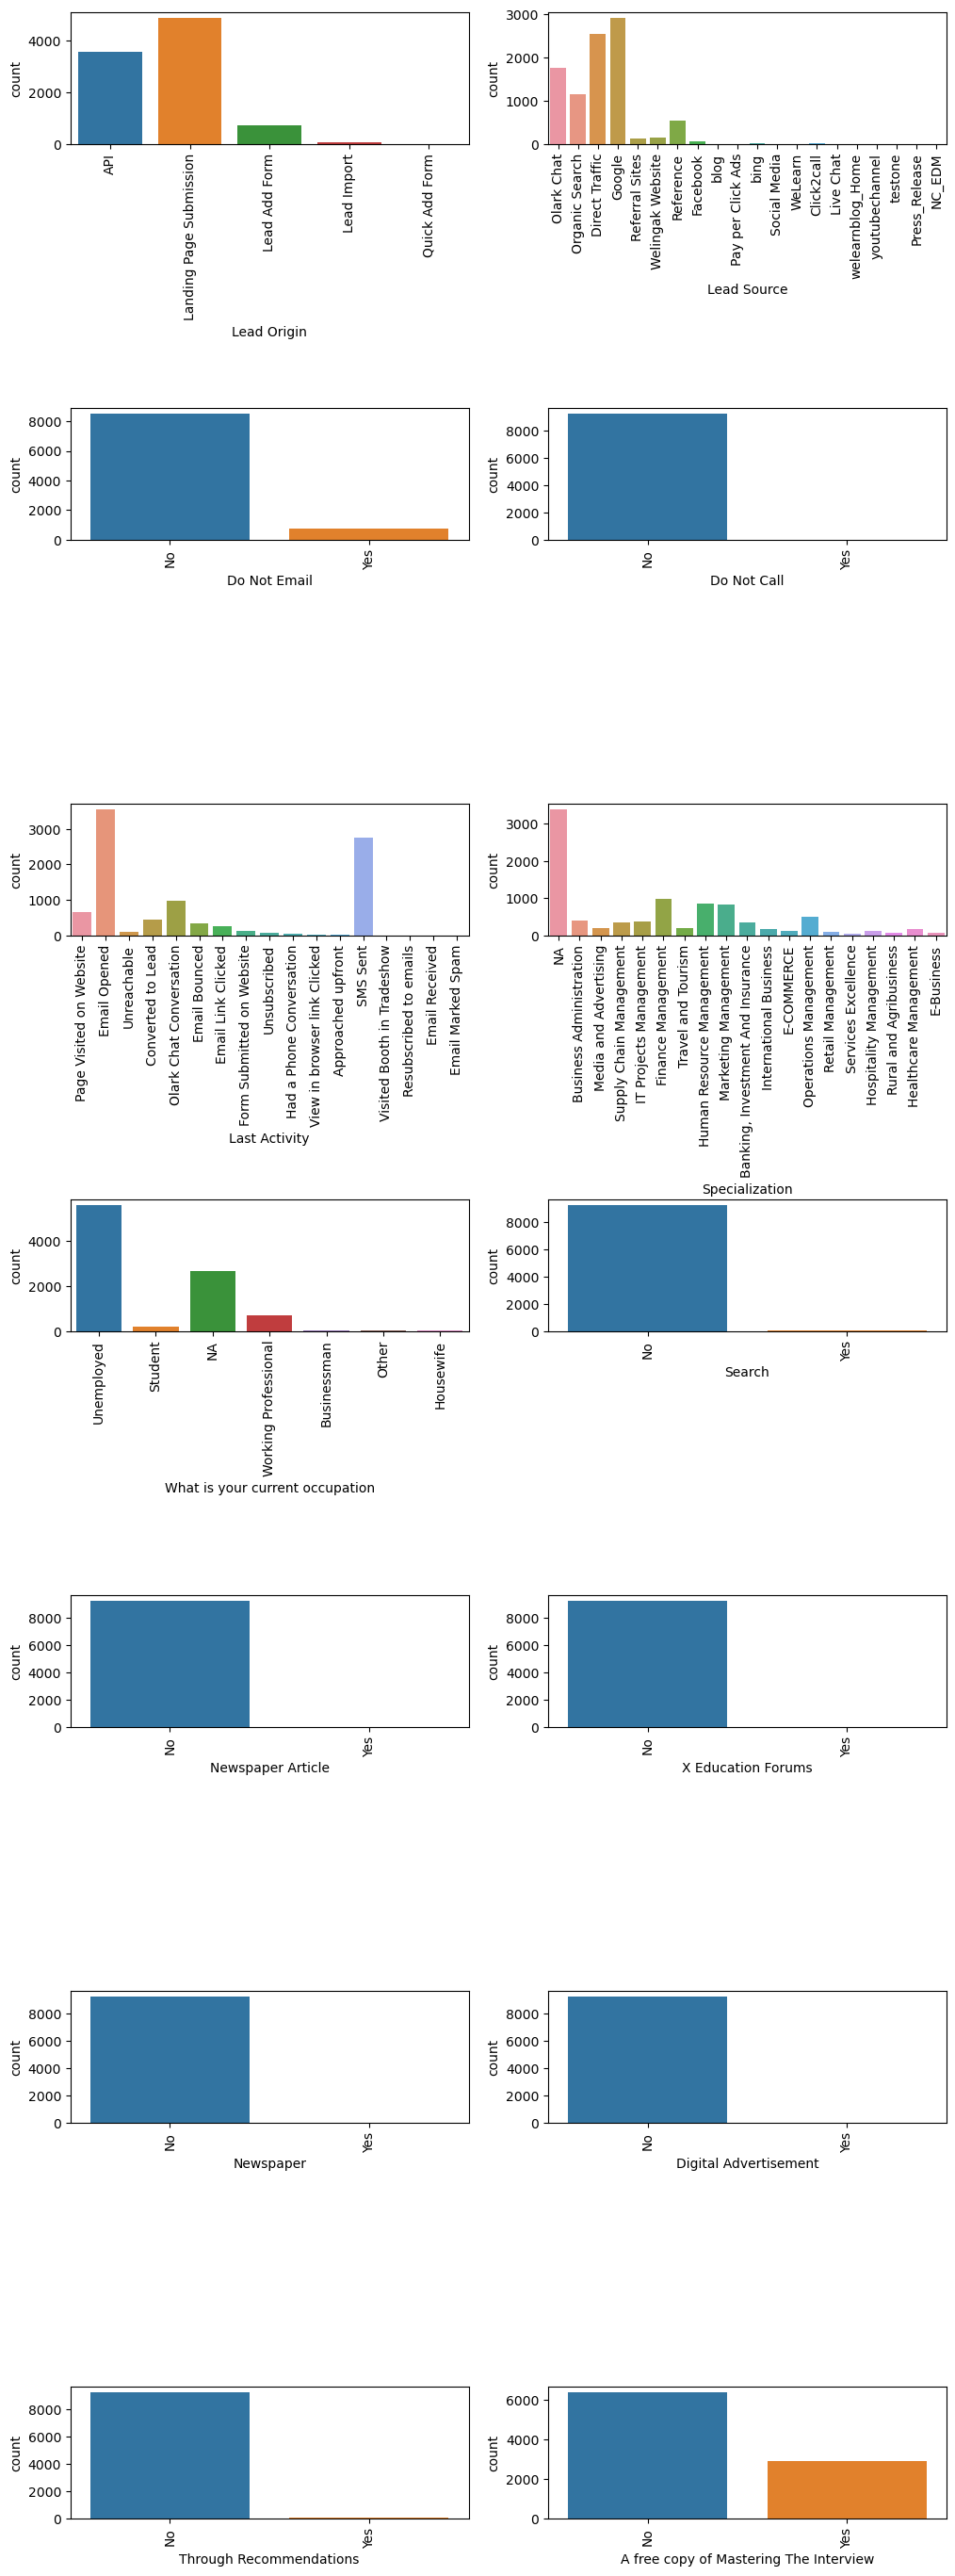

In [33]:
# plotting countplot for object dtype to get data distribution

cat_col = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(cat_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=df_leads) 
    plt.xticks(rotation=90)

plt.show()

Following columns have data which is `highly skewed` :
- 'Do Not Call',
- 'Search', 
- 'Newspaper Article',
- 'X Education Forums',
- 'Newspaper', 
- 'Digital Advertisement',
- 'Through Recommendations'. 

Hence these columns will be `dropped`.

In [34]:
# Dropping categorical columns with highly skewed data

print("Before Drop: ",df_leads.shape)
df_leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


### Outlier Analysis

In [35]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

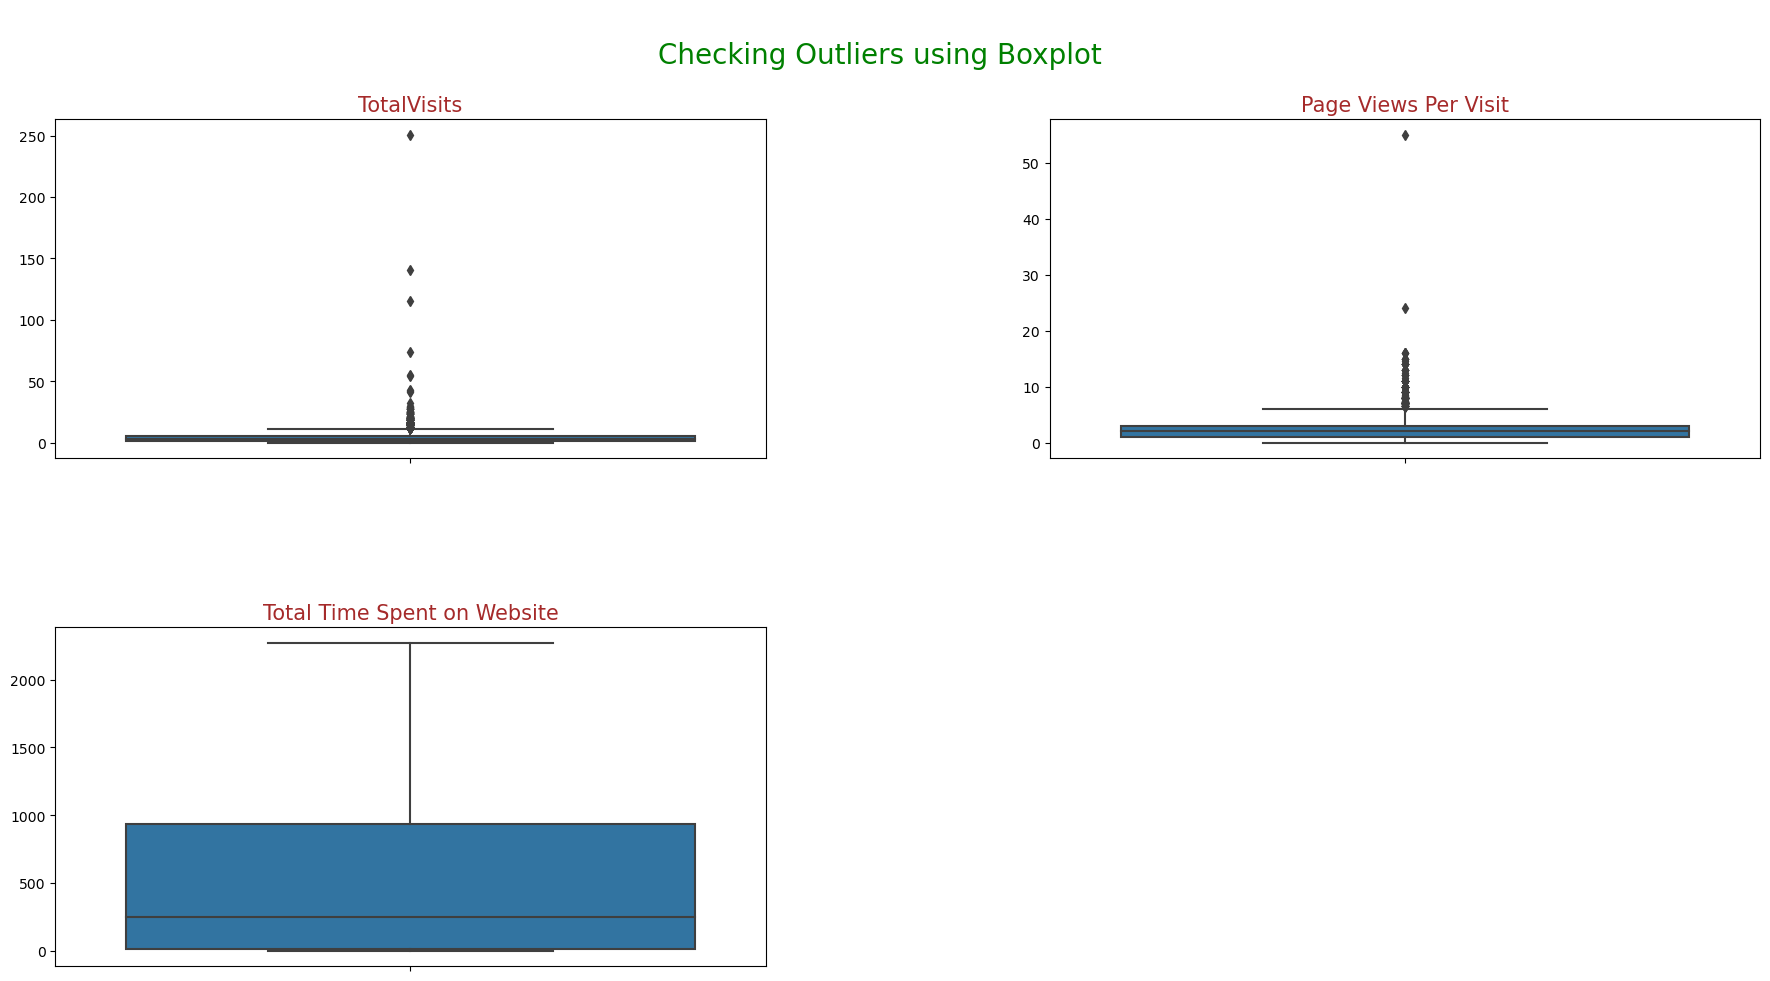

In [36]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF 
Check_Outliers(df_leads,num_cols)

`"TotalVisits"`,`"Page Views Per Visit"`:Both these variables contain outliers and will be treated by capping.

In [37]:
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


In [38]:
# Checking outliers for numerical variables other than target variable 
cols = ["TotalVisits","Page Views Per Visit"]

for i in cols:
    q1 = df_leads[i].describe()["25%"]
    q3 = df_leads[i].describe()["75%"]
    IQR = q3 - q1
    upper_bound = q3 + 1.5*IQR
    lower_bound = q1 - 1.5*IQR

    # capping upper_bound
    df_leads[i] = np.where(df_leads[i] > upper_bound, upper_bound,df_leads[i])
    # flooring lower_bound
    df_leads[i] = np.where(df_leads[i] < lower_bound, lower_bound,df_leads[i])

In [39]:
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.217424,487.698268,2.255105
std,0.486714,2.860471,548.021466,1.779471
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,11.000000,2272.000000,6.000000


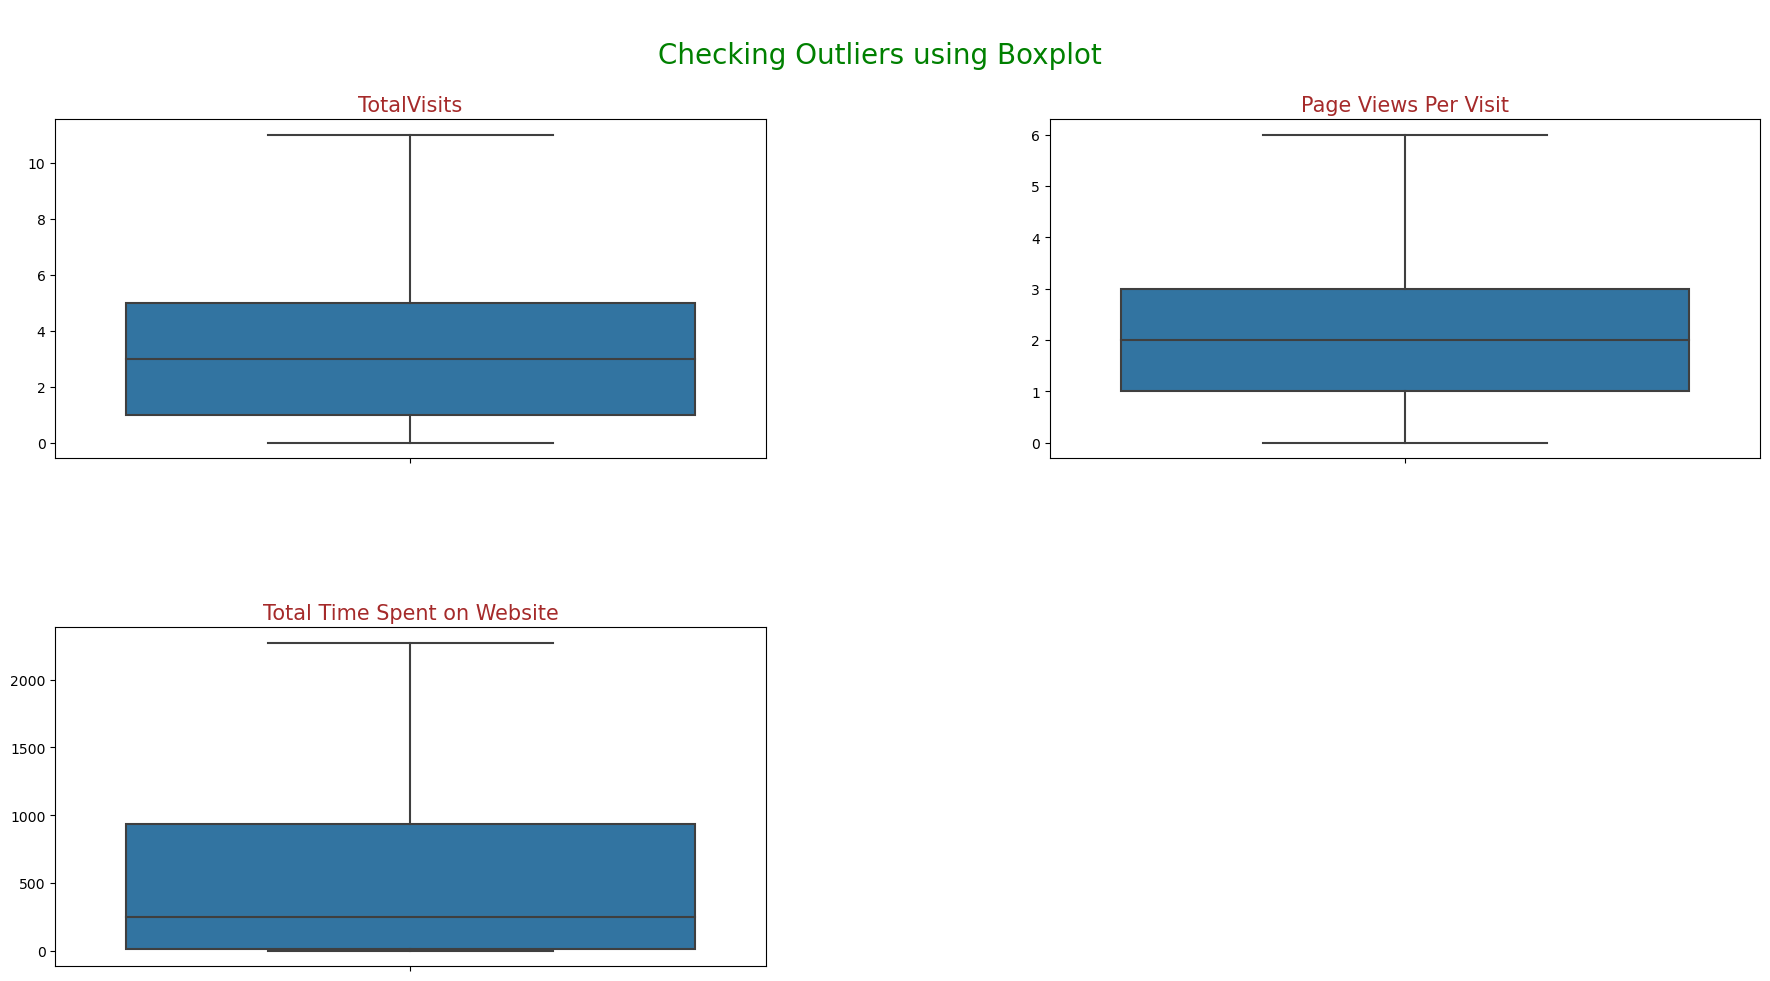

In [40]:
Check_Outliers(df_leads,num_cols)

### Fixing Invalid values & Standardising Data in columns

In [41]:
## Categorical Variables 

cat_cols = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization", "What is your current occupation",
            "A free copy of Mastering The Interview"]

for i in cat_cols:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("__"*40,"\n")

value_counts % for : Lead Origin 

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64 

________________________________________________________________________________ 

value_counts % for : Lead Source 

Lead Source
Google               31.482684
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
Click2call            0.043290
Social Media          0.021645
Live Chat             0.021645
Press_Release         0.021645
Pay per Click Ads     0.010823
blog                  0.010823
WeLearn               0.010823
welearnblog_Home      0.010823
youtubechannel        0.010823
testone               0.010823
NC_EDM        

NOTE: -
- We've noticed that some categories/levels in the `"Lead Score", "Specialization" and "Last Activity"` columns have very few records. To prevent ending up with a bunch of unnecessary dummy variables, we're planning to group these categories together under "Others".

In [42]:
# Grouping low frequency value levels to Others: Lead Source
df_leads['Lead Source'] = df_leads['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM","Facebook"],"Others")
df_leads['Lead Source'] = df_leads['Lead Source'].replace(["Referral Sites", "Welingak Website"],"Reference")

# value_counts percentage after replace
df_leads["Lead Source"].value_counts(normalize=True)*100

Lead Source
Google            31.482684
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Reference          8.668831
Others             0.844156
Name: proportion, dtype: float64

In [43]:
df_leads["Specialization"] = df_leads["Specialization"].replace(["Travel and Tourism", "Media and Advertising",
                                                                 "International Business", "Healthcare Management",
                                                                 "Hospitality Management", "E-COMMERCE", "Retail Management",
                                                                 "Rural and Agribusiness", "E-Business", "Services Excellence"],
                                                                "Others")

# value_counts percentage after replace
df_leads['Specialization'].value_counts(normalize=True)*100

Specialization
NA                                   36.580087
Others                               13.409091
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Name: proportion, dtype: float64

In [44]:
# Grouping low frequency value levels to Others: Last Activity
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')
# value_counts percentage after replace
df_leads['Last Activity'].value_counts(normalize=True)*100

Last Activity
Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: proportion, dtype: float64

In [45]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
df_leads.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
df_leads.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

Note: "Do Not Email" & "Free_copy" both are binary categorical columns lets map both of them yes/no to 1/0

In [46]:
# Mapping binary categorical variables (Yes/No to 1/0) 
df_leads['Do Not Email'] = df_leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df_leads['Free_copy'] = df_leads['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

In [47]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


In [48]:
df_leads[["TotalVisits", "Page Views Per Visit"]] = df_leads[["TotalVisits", "Page Views Per Visit"]].astype("int64")
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Lead Origin                  9240 non-null   object
 1   Lead Source                  9240 non-null   object
 2   Do Not Email                 9240 non-null   int64 
 3   Converted                    9240 non-null   int64 
 4   TotalVisits                  9240 non-null   int64 
 5   Total Time Spent on Website  9240 non-null   int64 
 6   Page Views Per Visit         9240 non-null   int64 
 7   Last Activity                9240 non-null   object
 8   Specialization               9240 non-null   object
 9   Current_occupation           9240 non-null   object
 10  Free_copy                    9240 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 794.2+ KB


## Step 4: Data Analysis (EDA)

### Checking Data Imbalance

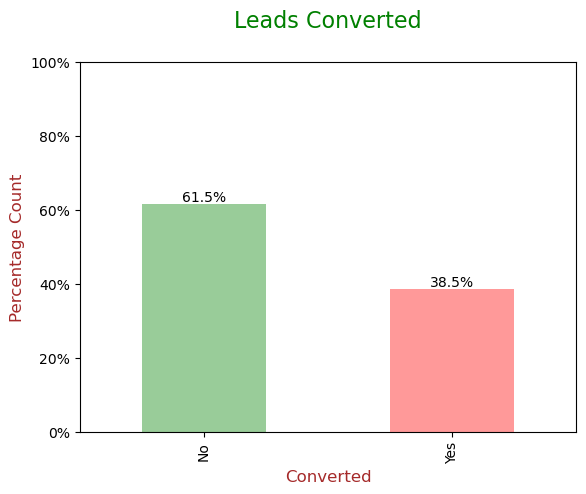

In [49]:
## ploting barplot for Target Variable

ax=(100*df_leads["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# yticks
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

# xticks
plt.xticks([0,1],["No","Yes"])

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

In [50]:
### Ratio of Data Imbalance
ratio=(df_leads["Converted"].value_counts(normalize=True).loc[0])/(df_leads["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


Conversion rate is of 38.5%, meaning only 38.5% of the people have converted to leads (Minority), while 61.5% of the people didnt convert to leads (Majority).

### Univariate Analysis

In [51]:
# Categorical Variables
#List of categorical columns
cat_cols = ["Lead Origin","Current_occupation","Do Not Email", "Free_copy","Lead Source","Last Activity","Specialization"]

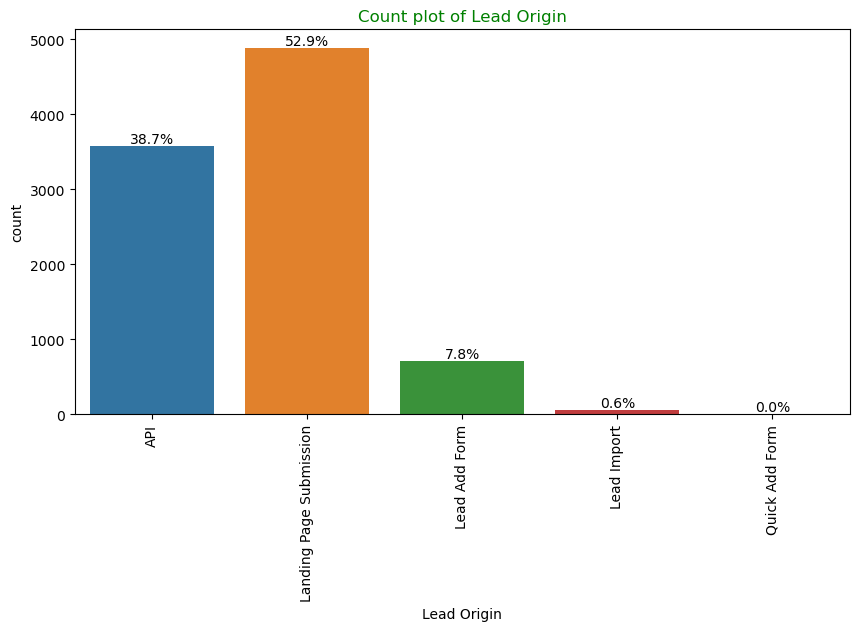

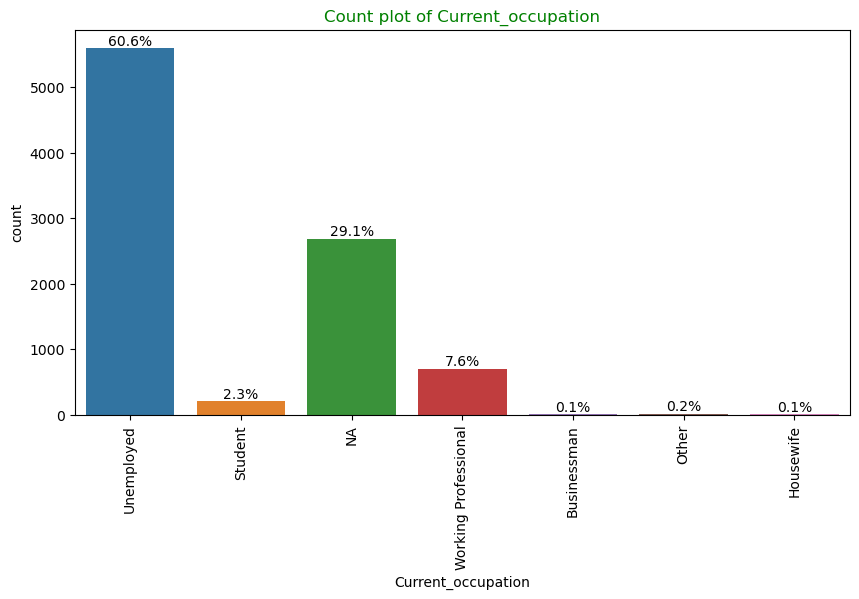

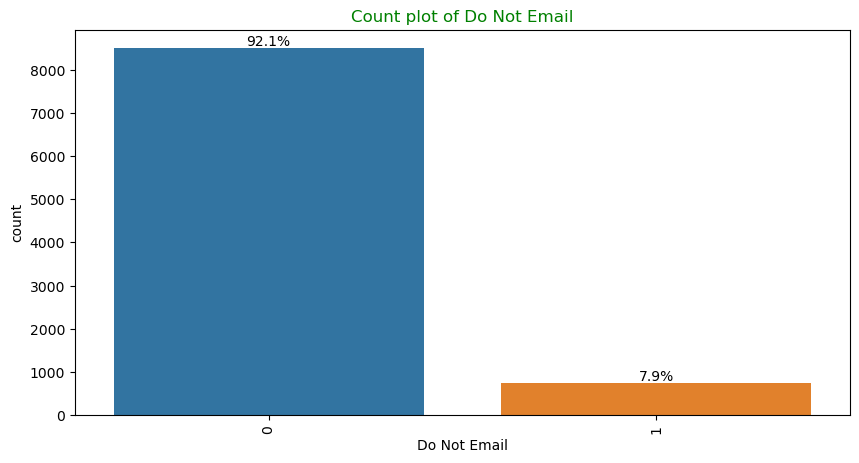

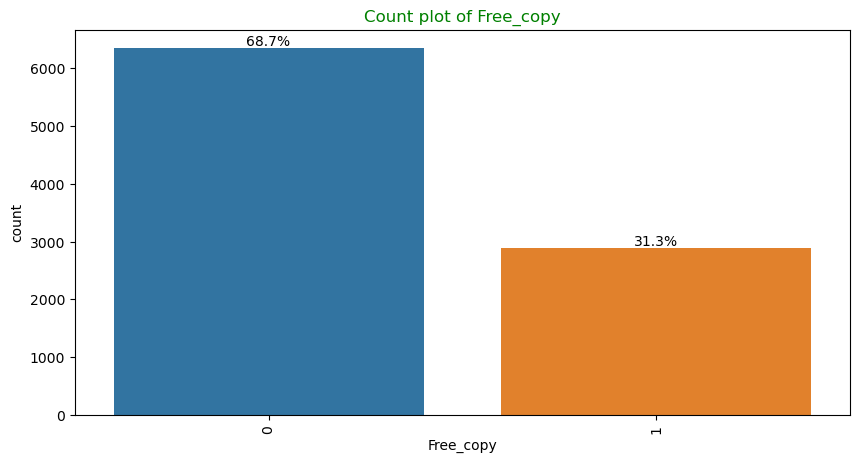

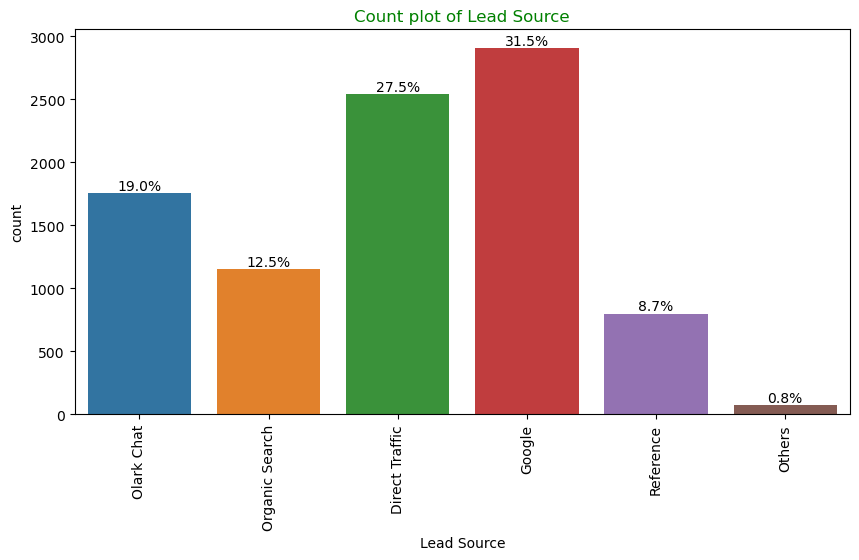

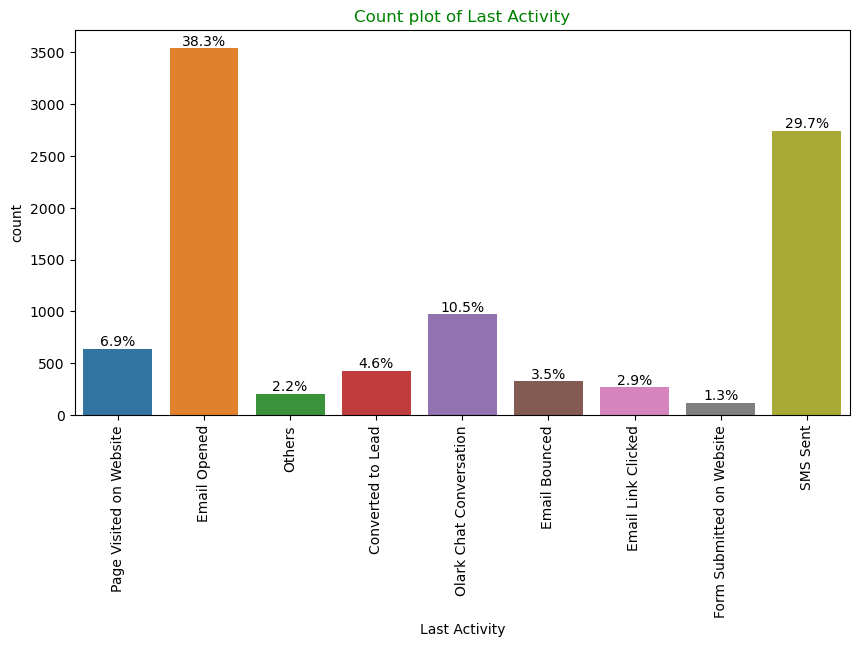

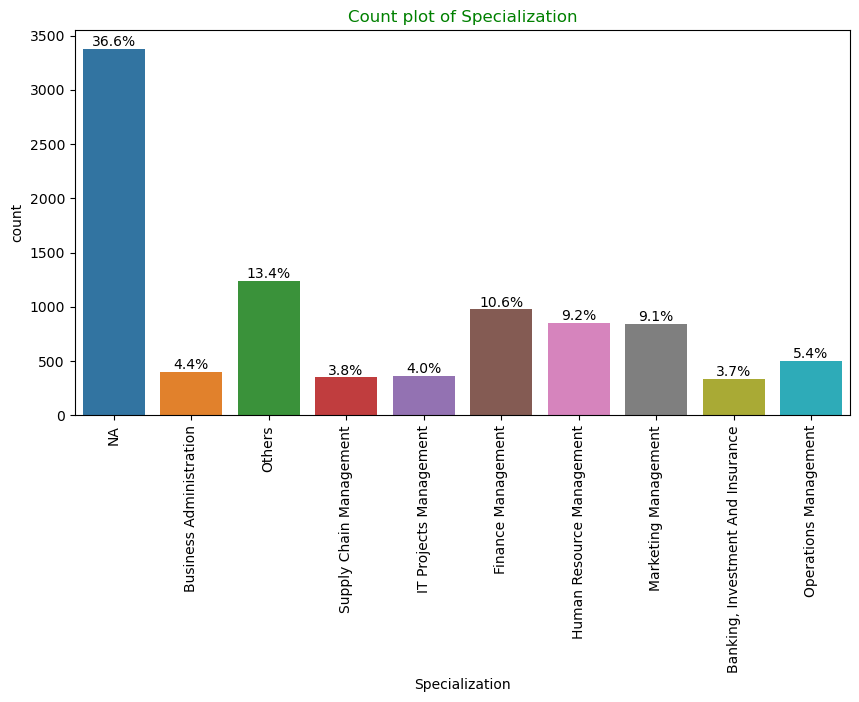

In [52]:
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

- **Lead Origin:** "Landing Page Submission" has 53% customers, "API" has 39%. 

- **Current_occupation:** It has almost 60% of the customers as Unemployed

- **Do Not Email:** 92% of the people has opted "NO".

- **Free Copy:** 69% of the people has opted "NO".

- **Lead Source:** 59% Lead source is from Google & Direct Traffic combined

- **Last Activity:** 68% of customers contribution in SMS Sent & Email Opened activities

- **Specialization:** Most of the specialization was not specified

### Bivariate Analysis

#### Categorical Variables

In [53]:
def Bivariate_cat(df,variable_name):
    Target="Converted"
    plt.figure(figsize=(10,6))
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=df_leads,palette="prism_r",alpha=0.46)
    total=len(df_leads[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")

    # Annotation
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

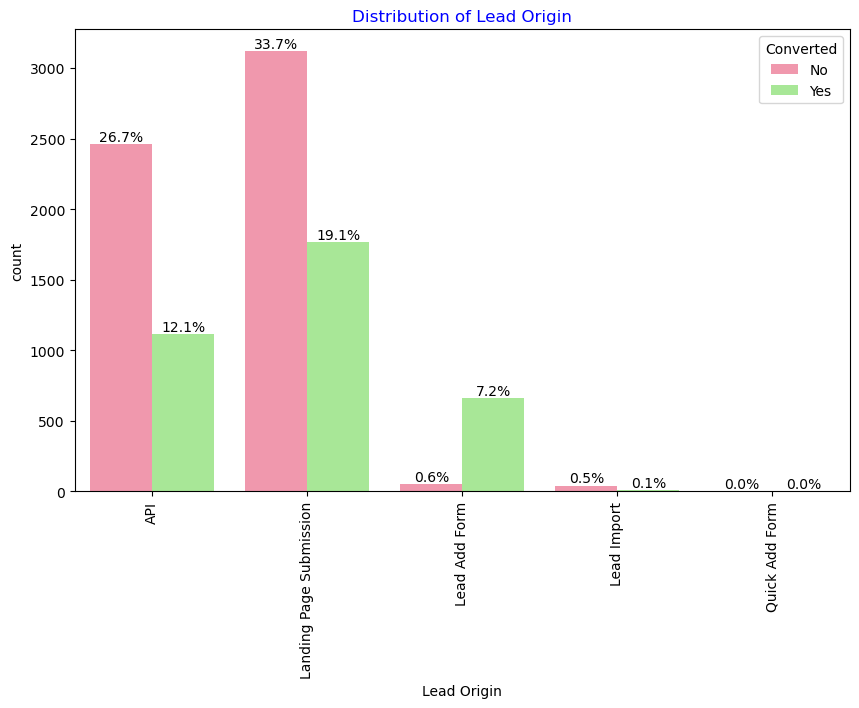

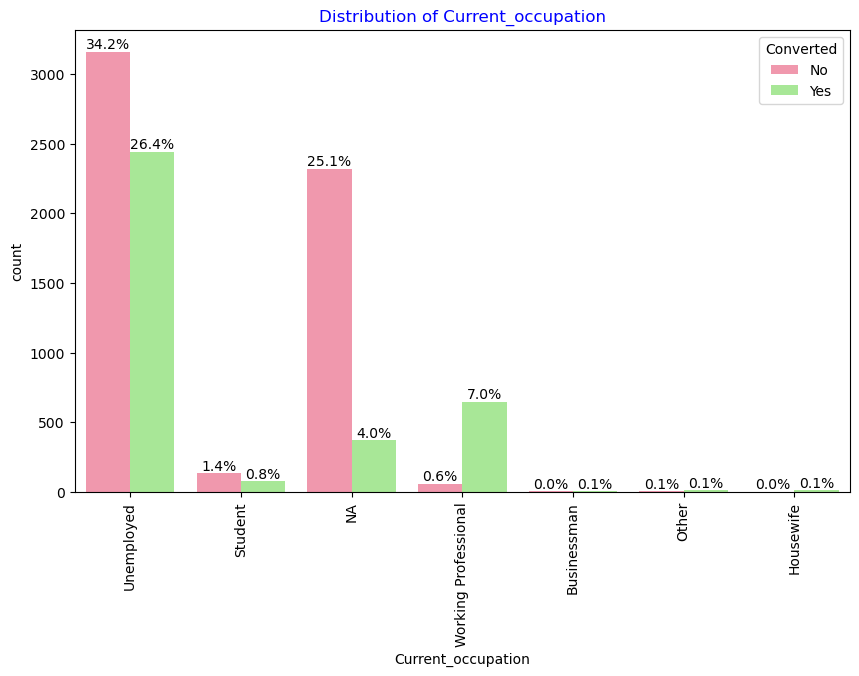

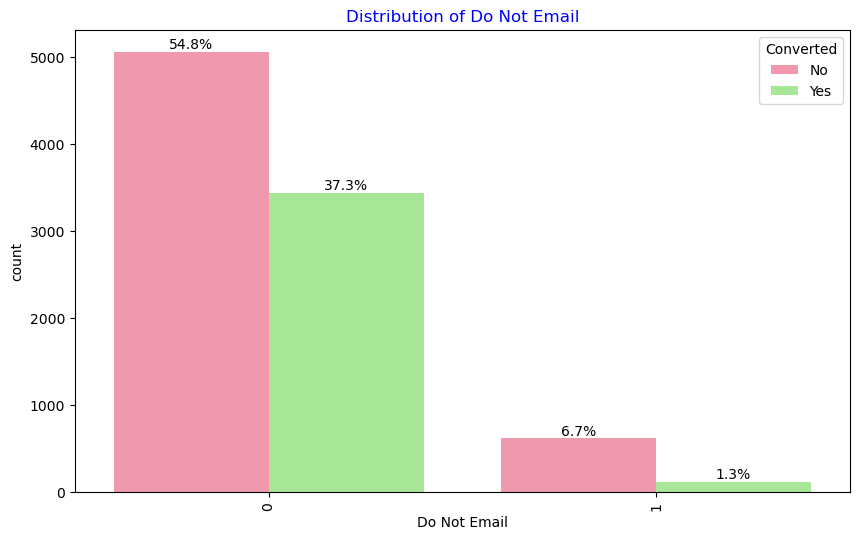

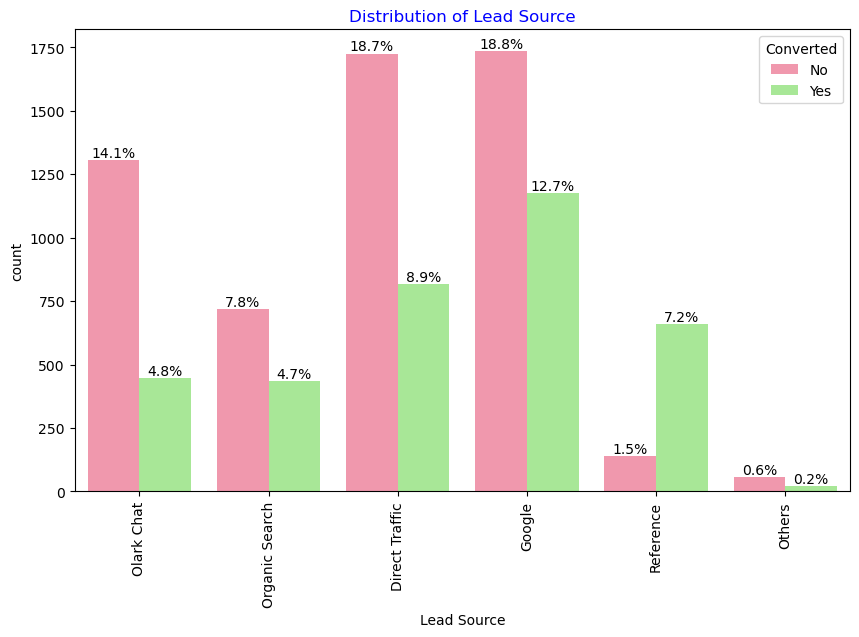

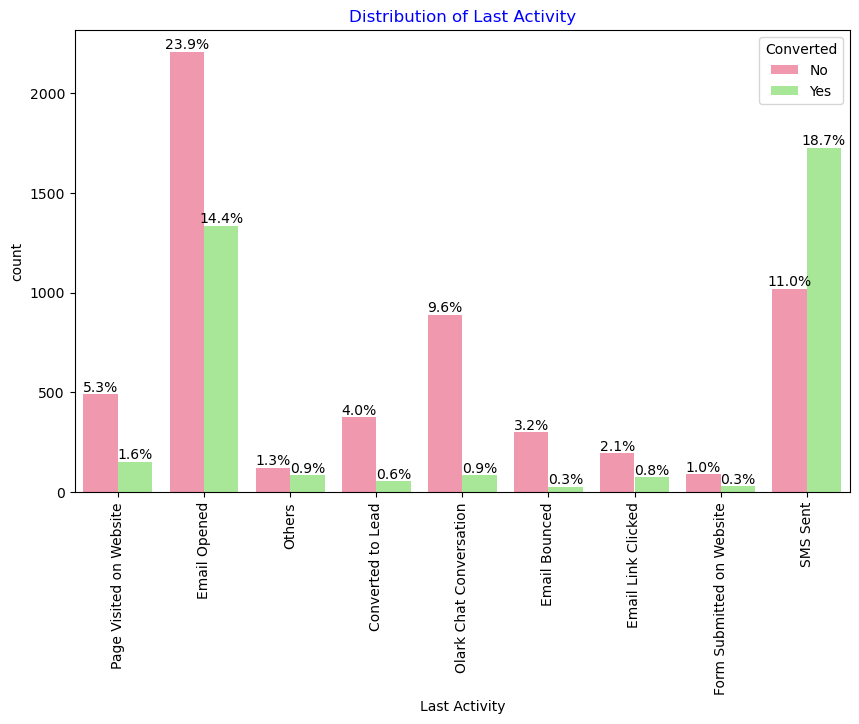

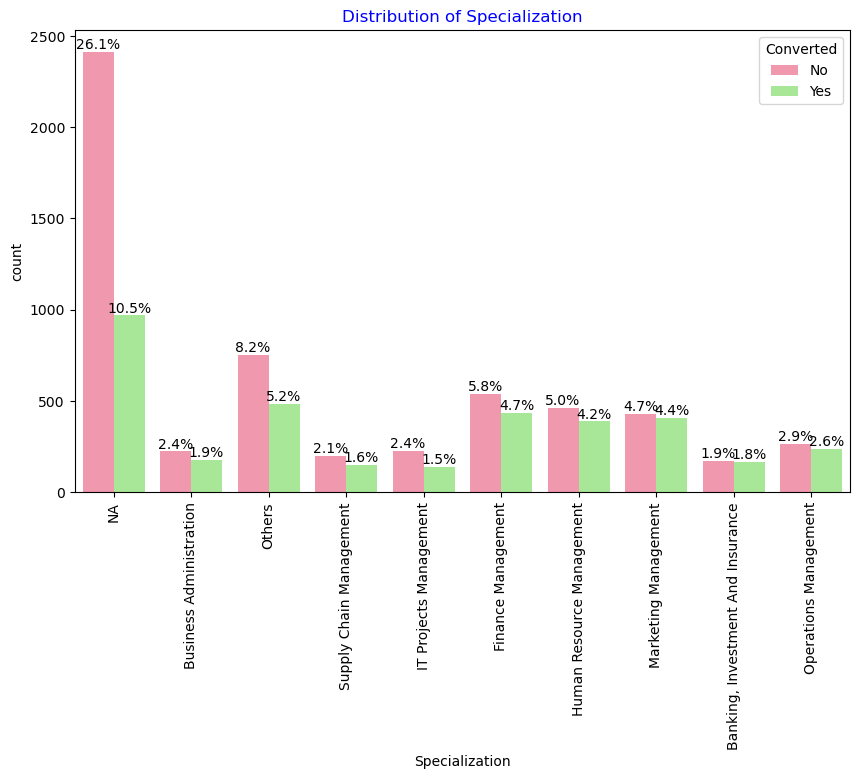

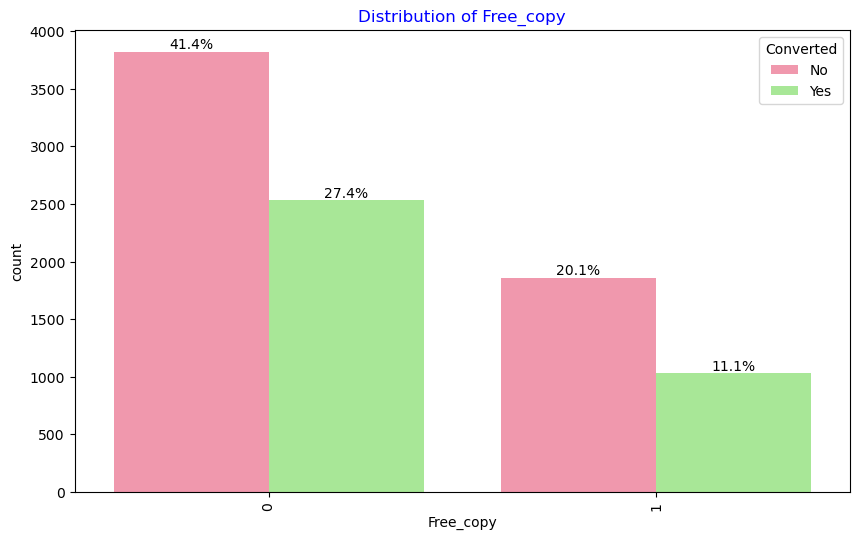

In [54]:
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","Free_copy"]

for i in cat_cols:
    Bivariate_cat(df_leads,variable_name=i)

Insights: -
- Lead Origin: Around 52% of all leads originated from _"Landing Page Submission"_ of which only 19% converted.The _"API"_ identified approximately 39% of customers with a 12% conversion.

- Current_occupation: Around 60% of the customers are _Unemployed_ with 26% converted. _Working Professional_ contribute only 7.6% of total customers but there are much more onverted than not in this category.

- Do Not Email: 92% of the people has opted "No", However those who opted "Yes" have much less converted than not converted in ratio.

- Lead Source: _Google_ has and _Direct Traffic_ have almost same perc of not converted however google has more converted. Those with Reference have very high ratio of converted even if they are not many.Seems company should try to bring in more customers with referrals.

- Last Activity: _'SMS Sent'_ has high lead conversion rate, _'Email Opened'_ activity contributed 38% of last activities performed by the customers.

- Specialization: Marketing Managemt,HR Management,Finance Management shows good conversion, while most of the records have unspecified specializaiton.

- Free Copy: Most People did not want free copy and those have higher conversion rate also than those who wanted free copy

#### Numerical Variables

<Figure size 1600x400 with 0 Axes>

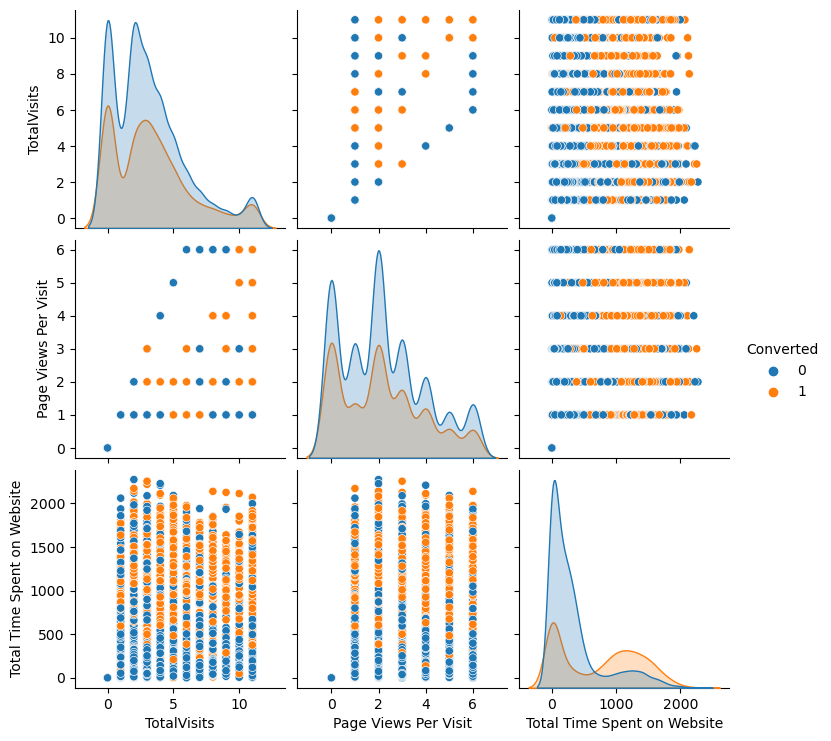

In [55]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=df_leads,vars=num_cols,hue="Converted")                                  
plt.show()

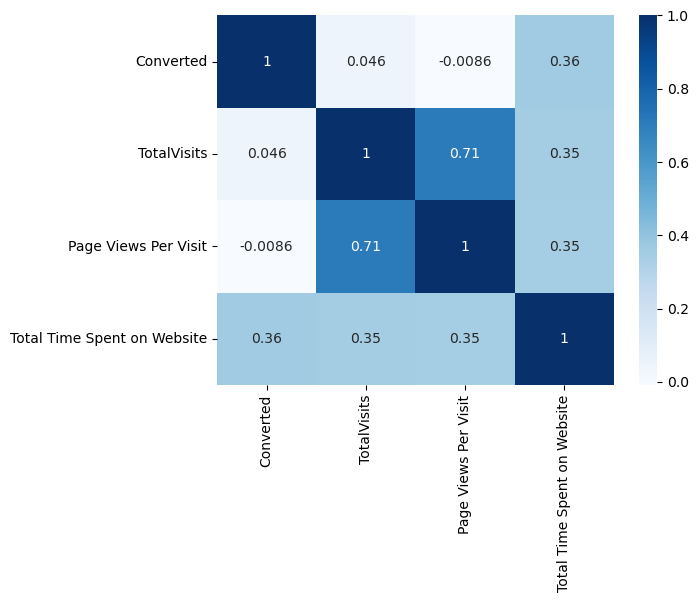

In [56]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
# Heatmap of correlation
sns.heatmap(data=df_leads[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

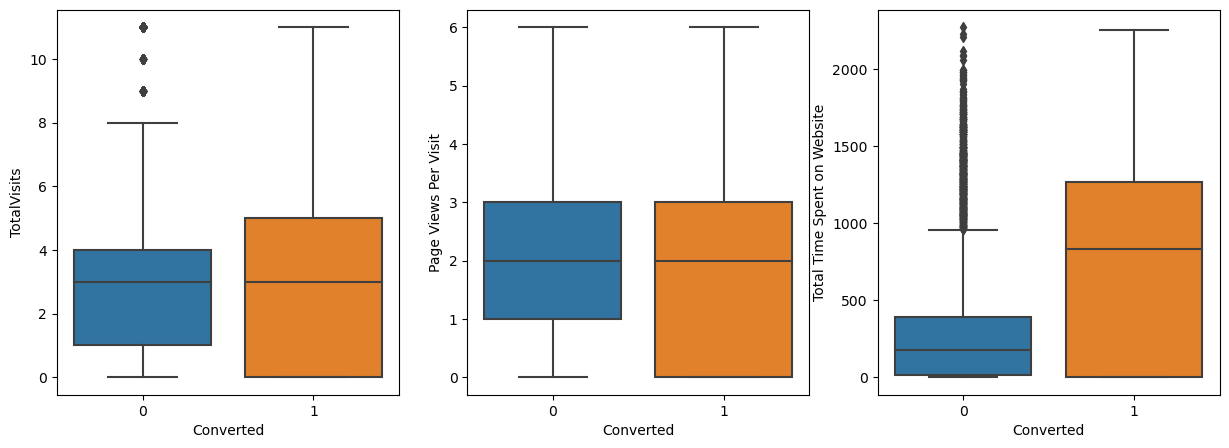

In [57]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

- Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot

## Step 5: Data Preparation

### Dummy Variables

In [58]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0,0,0,0,Page Visited on Website,NA,Unemployed,0
1,API,Organic Search,0,0,5,674,2,Email Opened,NA,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2,1532,2,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1,305,1,Others,Others,Unemployed,0
4,Landing Page Submission,Google,0,1,2,1428,1,Converted to Lead,NA,Unemployed,0


In [59]:
df_leads.Specialization.value_counts(normalize= True)*100

Specialization
NA                                   36.580087
Others                               13.409091
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Name: proportion, dtype: float64

In [60]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df_leads[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]],
                       drop_first=True, dtype= int)

# Adding the results to the master dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

In [61]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_NA,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Current_occupation_Housewife,Current_occupation_NA,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
0,API,Olark Chat,0,0,0,0,0,Page Visited on Website,NA,Unemployed,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5,674,2,Email Opened,NA,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2,1532,2,Email Opened,Business Administration,Student,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1,305,1,Others,Others,Unemployed,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2,1428,1,Converted to Lead,NA,Unemployed,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [62]:
df_leads = df_leads.drop(columns= ["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"], axis= 1)

In [63]:
df_leads.shape

(9240, 38)

In [64]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 38 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Do Not Email                              9240 non-null   int64
 1   Converted                                 9240 non-null   int64
 2   TotalVisits                               9240 non-null   int64
 3   Total Time Spent on Website               9240 non-null   int64
 4   Page Views Per Visit                      9240 non-null   int64
 5   Free_copy                                 9240 non-null   int64
 6   Lead Origin_Landing Page Submission       9240 non-null   int32
 7   Lead Origin_Lead Add Form                 9240 non-null   int32
 8   Lead Origin_Lead Import                   9240 non-null   int32
 9   Lead Origin_Quick Add Form                9240 non-null   int32
 10  Lead Source_Google                        9240 non-null   in

## Step 6: Test-Train Split

In [65]:
X = df_leads.drop('Converted', axis=1)
y = df_leads["Converted"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [67]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape,"\nX_test:", X_test.shape,"\ny_test:",y_test.shape)

X_train: (6468, 37) 
y_train: (6468,) 
X_test: (2772, 37) 
y_test: (2772,)


## Step 7: Feature Scaling

In [68]:
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols= ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [69]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_NA,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Current_occupation_Housewife,Current_occupation_NA,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
1871,0,-1.122305,-0.885371,-1.225418,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
6795,0,0.275215,0.005716,-0.662891,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3516,0,0.624595,-0.691418,-0.100364,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
8105,0,0.624595,1.365219,1.587217,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3934,0,-1.122305,-0.885371,-1.225418,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [70]:
df_leads.corr()[abs(df_leads.corr())>0.8]

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_NA,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Current_occupation_Housewife,Current_occupation_NA,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
Do Not Email,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Converted,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalVisits,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Time Spent on Website,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Page Views Per Visit,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Free_copy,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lead Origin_Landing Page Submission,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lead Origin_Lead Add Form,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.881808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lead Origin_Lead Import,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.823289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lead Origin_Quick Add Form,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


"Lead Source_Others", "Lead Source_Reference", "Lead Origin_Lead Import", "Lead Origin_Lead Add Form" have high correlation.

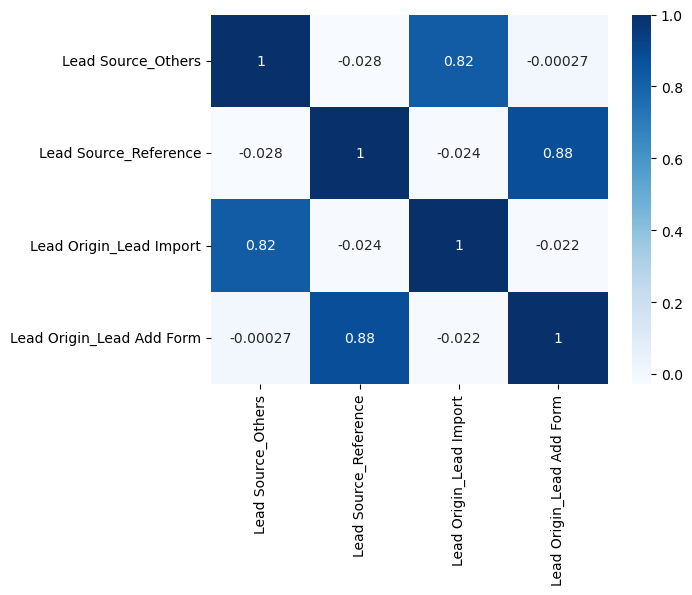

In [71]:
# Heatmap

sns.heatmap(df_leads[["Lead Source_Others", "Lead Source_Reference", "Lead Origin_Lead Import", "Lead Origin_Lead Add Form"]].corr(),
            cmap="Blues", annot=True)
plt.show()

Lets drop `'Lead Origin_Lead Import'` and `'Lead Origin_Lead Add Form'`.

In [72]:
X_test = X_test.drop(columns= ['Lead Origin_Lead Import','Lead Origin_Lead Add Form'], axis= 1)

X_train = X_train.drop(columns= ['Lead Origin_Lead Import','Lead Origin_Lead Add Form'], axis= 1)

## Step 8: Model Building

### Feature Selection Using RFE

In [73]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [74]:
rfe_df=pd.DataFrame()
rfe_df['features']=X_train.columns
rfe_df['Feature Chosen'] = rfe.support_
rfe_df['Ranking']=rfe.ranking_
rfe_df.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
0,Do Not Email,True,1
30,Current_occupation_NA,True,1
29,Current_occupation_Housewife,True,1
25,Specialization_NA,True,1
19,Last Activity_SMS Sent,True,1
18,Last Activity_Page Visited on Website,True,1
16,Last Activity_Olark Chat Conversation,True,1
14,Last Activity_Email Opened,True,1
13,Last Activity_Email Link Clicked,True,1
11,Lead Source_Reference,True,1


In [75]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Specialization_NA',
       'Current_occupation_Housewife', 'Current_occupation_NA',
       'Current_occupation_Working Professional'],
      dtype='object')

In [76]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

### UDF for VIF

In [77]:
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model 1

In [78]:
# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()

# Summary of the logistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2680.5
Date:                Tue, 17 Oct 2023   Deviance:                       5361.1
Time:                        19:56:39   Pearson chi2:                 7.01e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3938
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [79]:
# Checking VIF
get_vif(X_train_sm1)

,Features,VIF
0,const,24.11
1,Last Activity_Email Opened,3.69
2,Lead Origin_Landing Page Submission,3.31
3,Last Activity_SMS Sent,3.31
4,Specialization_NA,2.83
5,Last Activity_Olark Chat Conversation,2.37
6,Lead Source_Olark Chat,1.93
7,Last Activity_Page Visited on Website,1.69
8,Lead Source_Reference,1.45
9,Last Activity_Email Link Clicked,1.34


"Current_occupation_Housewife" column will be removed from model due to high p-value of 0.999

### Model 2

In [80]:
# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("Current_occupation_Housewife")

In [81]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

# Summary of the logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2687.7
Date:                Tue, 17 Oct 2023   Deviance:                       5375.4
Time:                        19:56:39   Pearson chi2:                 7.02e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3924
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [82]:
# VIF
get_vif(X_train_sm2)

,Features,VIF
0,const,24.09
1,Last Activity_Email Opened,3.69
2,Lead Origin_Landing Page Submission,3.31
3,Last Activity_SMS Sent,3.31
4,Specialization_NA,2.83
5,Last Activity_Olark Chat Conversation,2.37
6,Lead Source_Olark Chat,1.93
7,Last Activity_Page Visited on Website,1.69
8,Lead Source_Reference,1.45
9,Last Activity_Email Link Clicked,1.34


Drop "Last Activity_Olark Chat Conversation" due to high p-value

### Model 3

In [83]:
rfe_col=rfe_col.drop("Last Activity_Olark Chat Conversation")

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

# Summary of the logistic regression model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2688.3
Date:                Tue, 17 Oct 2023   Deviance:                       5376.7
Time:                        19:56:39   Pearson chi2:                 7.04e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3923
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [84]:
# VIF
get_vif(X_train_sm3)

,Features,VIF
0,const,18.52
1,Lead Origin_Landing Page Submission,3.31
2,Specialization_NA,2.82
3,Last Activity_Email Opened,2.11
4,Last Activity_SMS Sent,2.05
5,Lead Source_Olark Chat,1.81
6,Lead Source_Reference,1.45
7,Last Activity_Page Visited on Website,1.34
8,Total Time Spent on Website,1.25
9,Current_occupation_Working Professional,1.15


Const having high VIF does not make sense as it is constant, as most other variable are dummy so when dummy is 1 const is 1 for them all so this can be ignored. Other variables are stable. We will evaluate this model first. All variables have acceptable p-value and vif

### Parameters

In [85]:
logm3.params

const                                     -1.178219
Do Not Email                              -0.885788
Total Time Spent on Website                1.011129
Lead Origin_Landing Page Submission       -1.204551
Lead Source_Olark Chat                     0.909721
Lead Source_Reference                      2.173159
Last Activity_Email Link Clicked           0.752270
Last Activity_Email Opened                 1.297857
Last Activity_Others                       1.818685
Last Activity_Page Visited on Website      0.758666
Last Activity_SMS Sent                     2.479219
Specialization_NA                         -1.004834
Current_occupation_NA                     -1.193984
Current_occupation_Working Professional    2.409713
dtype: float64

## Step 9: Model Evaluation

In [86]:
# Prob. of getting 1
y_train_prob = logm3.predict(X_train_sm3)
y_train_prob = y_train_prob.values.reshape(-1)
y_train_prob[:10]

array([0.5334839 , 0.11066505, 0.3374708 , 0.81409802, 0.29510921,
       0.98774879, 0.13908907, 0.99302901, 0.35634549, 0.90826774])

In [87]:
# Creating a dataframe with actual target variable and predictions

predicted_train = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Converted_Prob':y_train_prob})
predicted_train.head()

,Prospect ID,Converted,Converted_Prob
0,1871,0,0.533484
1,6795,0,0.110665
2,3516,0,0.337471
3,8105,0,0.814098
4,3934,0,0.295109


### Plotting the ROC Curve

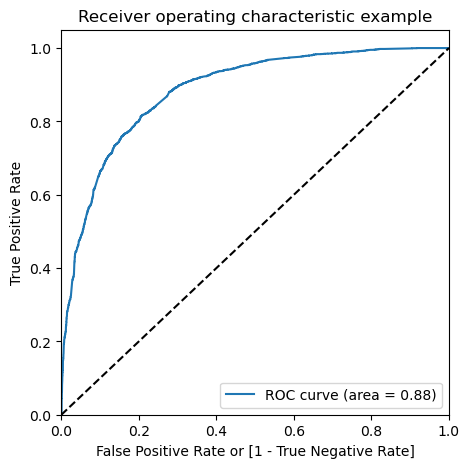

In [88]:
fpr, tpr, thresholds = metrics.roc_curve(predicted_train["Converted"], predicted_train["Converted_Prob"],
                                         drop_intermediate = False )
auc_score = metrics.roc_auc_score(predicted_train["Converted"], predicted_train["Converted_Prob"])
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

#### Now we have to find the optimal cutoff Threshold value of Probability.

In [89]:
# Columns with different probability cutoffs 
cutoffs = [float(x)/10 for x in range(10)]
for i in cutoffs:
    predicted_train[i]= predicted_train['Converted_Prob'].map(lambda x: 1 if x > i else 0)
predicted_train.head()

,Prospect ID,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1871,0,0.533484,1,1,1,1,1,1,0,0,0,0
1,6795,0,0.110665,1,1,0,0,0,0,0,0,0,0
2,3516,0,0.337471,1,1,1,1,0,0,0,0,0,0
3,8105,0,0.814098,1,1,1,1,1,1,1,1,1,0
4,3934,0,0.295109,1,1,1,0,0,0,0,0,0,0


In [90]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
metrics_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(predicted_train["Converted"], predicted_train[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    metrics_df.loc[i] =[ i, accuracy, sensi, speci]
print(metrics_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.606061  0.977291  0.377311
0.2   0.2  0.749382  0.918897  0.644928
0.3   0.3  0.789270  0.840227  0.757871
0.4   0.4  0.805813  0.772506  0.826337
0.5   0.5  0.812461  0.702758  0.880060
0.6   0.6  0.795609  0.595296  0.919040
0.7   0.7  0.777984  0.510543  0.942779
0.8   0.8  0.755566  0.412814  0.966767
0.9   0.9  0.700680  0.233577  0.988506


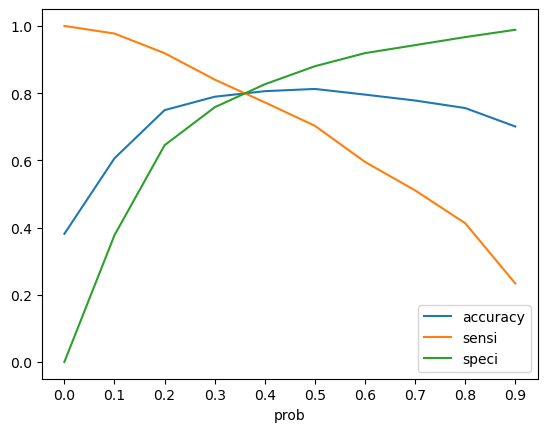

In [91]:
metrics_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(ticks= num)
plt.show()

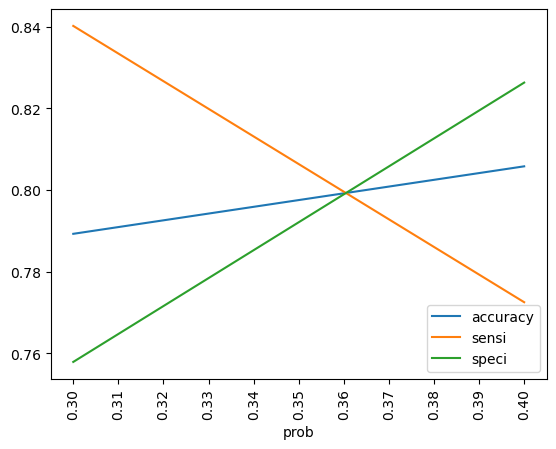

In [92]:
# Points intersect somewhere between prob = 0.3 and 0.4
intersection = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
intersection['prob'] = np.linspace(0.3, 0.4, 11)
intersection['accuracy'] = np.linspace(0.789270, 0.805813,11)
intersection['sensi'] = np.linspace(0.840227, 0.772506, 11)
intersection['speci'] = np.linspace(0.757871, 0.826337, 11)
intersection.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(intersection["prob"].tolist(), rotation= 90)
plt.show()

The plot above indicates 0.36 as optimal cut-off

In [93]:
predicted_train['Predicted'] = predicted_train["Converted_Prob"].map(lambda x: 1 if x > 0.36 else 0)

# checking head
predicted_train.head()

,Prospect ID,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
0,1871,0,0.533484,1,1,1,1,1,1,0,0,0,0,1
1,6795,0,0.110665,1,1,0,0,0,0,0,0,0,0,0
2,3516,0,0.337471,1,1,1,1,0,0,0,0,0,0,0
3,8105,0,0.814098,1,1,1,1,1,1,1,1,1,0,1
4,3934,0,0.295109,1,1,1,0,0,0,0,0,0,0,0


In [94]:
# deleting the unwanted columns from dataframe
predicted_train.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 
predicted_train.head()

,Prospect ID,Converted,Converted_Prob,Predicted
0,1871,0,0.533484,1
1,6795,0,0.110665,0
2,3516,0,0.337471,0
3,8105,0,0.814098,1
4,3934,0,0.295109,0


### UDF to calculate all Metrics

In [95]:
def calc_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

In [96]:
confusion_matrix = metrics.confusion_matrix(predicted_train['Converted'], predicted_train['Predicted'])
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
calc_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

Confusion Matrix
[[3202  800]
 [ 488 1978]] 

************************************************** 

True Negative                    :  3202
True Positive                    :  1978
False Negative                   :  488
False Positve                    :  800
Model Accuracy                   :  0.8009
Model Sensitivity                :  0.8021
Model Specificity                :  0.8001
Model Precision                  :  0.712
Model Recall                     :  0.8021
Model True Positive Rate (TPR)   :  0.8021
Model False Positive Rate (FPR)  :  0.1999


************************************************** 



### Precision-Recall Curve

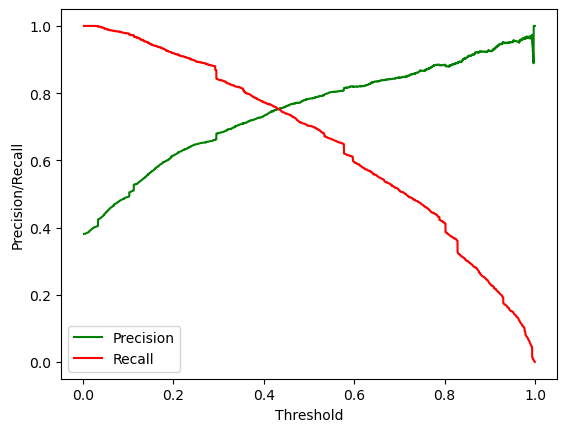

In [97]:
p, r, thresholds = precision_recall_curve(predicted_train['Converted'], predicted_train['Converted_Prob'])

plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

Depending on business needs, we can choose precision-recall curve to find cutoff instead of sensitivity-specificity. We will proceed with the sensitivity-specificity value.

### Adding Lead Score Column

In [98]:
predicted_train["Lead_Score"] = predicted_train['Converted_Prob'].map( lambda x: round(x*100))
predicted_train.head()

,Prospect ID,Converted,Converted_Prob,Predicted,Lead_Score
0,1871,0,0.533484,1,53
1,6795,0,0.110665,0,11
2,3516,0,0.337471,0,34
3,8105,0,0.814098,1,81
4,3934,0,0.295109,0,30


## Step 10: Making Predictions on test set

### Scaling Test dataset

In [99]:
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_NA', 'Current_occupation_NA',
       'Current_occupation_Working Professional'],
      dtype='object')

In [100]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_NA,Current_occupation_NA,Current_occupation_Working Professional
4269,0,0.964504,0,0,0,0,0,0,0,1,1,1,0
2376,0,-0.885371,0,0,1,0,0,0,0,1,1,0,0
7766,0,-0.777416,0,0,0,0,0,1,0,0,0,0,1
9199,0,-0.885371,0,1,0,0,0,0,0,0,1,0,0
4359,0,-0.885371,0,0,1,0,1,0,0,0,0,0,0


Prediction on Test Dataset using final model

In [101]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 14)

In [102]:
y_test_prob = logm3.predict(X_test_sm)
y_test_prob[:10]

4269    0.519345
2376    0.828368
7766    0.905861
9199    0.102610
4359    0.801799
9186    0.582609
1631    0.473531
8963    0.216770
8007    0.021133
5324    0.376893
dtype: float64

In [103]:
predicted_test = pd.DataFrame(y_test_prob)
predicted_test.head()

,0
4269,0.519345
2376,0.828368
7766,0.905861
9199,0.102610
4359,0.801799


In [104]:
predicted_test = predicted_test.rename(columns= {0:'Convert_Prob'})
predicted_test.head()

,Convert_Prob
4269,0.519345
2376,0.828368
7766,0.905861
9199,0.102610
4359,0.801799


In [105]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [106]:
predicted_test['Prospect ID'] = predicted_test.index

predicted_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

#Concat both dataframes
predicted_test = pd.concat([predicted_test, y_test_df],axis=1)

predicted_test.head()

,Convert_Prob,Prospect ID,Converted
0,0.519345,4269,1
1,0.828368,2376,1
2,0.905861,7766,1
3,0.102610,9199,0
4,0.801799,4359,1


In [107]:
# Rearranging the columns
predicted_test = predicted_test.reindex(['Prospect ID','Converted','Convert_Prob'], axis=1)

In [108]:
predicted_test.head()

,Prospect ID,Converted,Convert_Prob
0,4269,1,0.519345
1,2376,1,0.828368
2,7766,1,0.905861
3,9199,0,0.102610
4,4359,1,0.801799


In [109]:
predicted_test["Predicted"] = predicted_test['Convert_Prob'].map(lambda x: 1 if x > 0.36 else 0)
predicted_test.head()

,Prospect ID,Converted,Convert_Prob,Predicted
0,4269,1,0.519345,1
1,2376,1,0.828368,1
2,7766,1,0.905861,1
3,9199,0,0.102610,0
4,4359,1,0.801799,1


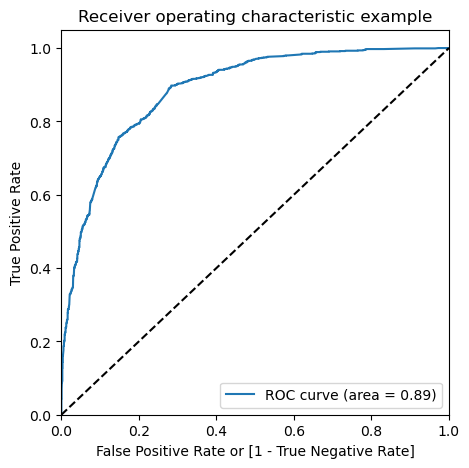

In [110]:
# Drawing ROC curve for Test Set

fpr, tpr, thresholds = metrics.roc_curve(predicted_test["Converted"], predicted_test["Convert_Prob"],
                                         drop_intermediate = False )
auc_score = metrics.roc_auc_score(predicted_test["Converted"], predicted_test["Convert_Prob"])
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Area under ROC curve is 0.89 out of 1 which indicates a good predictive model

### Test set Model Evaluation

In [111]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(predicted_test['Converted'], predicted_test['Predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
calc_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1335  342]
 [ 220  875]] 

************************************************** 

True Negative                    :  1335
True Positive                    :  875
False Negative                   :  220
False Positve                    :  342
Model Accuracy                   :  0.7973
Model Sensitivity                :  0.7991
Model Specificity                :  0.7961
Model Precision                  :  0.719
Model Recall                     :  0.7991
Model True Positive Rate (TPR)   :  0.7991
Model False Positive Rate (FPR)  :  0.2039


************************************************** 



The accuracy, sensitivity, specificity, precision and recall are all very close to those of training dataset. Thus, model is performing well on unseen data.

In [112]:
# Lets add Lead Score 

predicted_test['Lead_Score'] = predicted_test['Convert_Prob'].map( lambda x: round(x*100))
predicted_test.head()

,Prospect ID,Converted,Convert_Prob,Predicted,Lead_Score
0,4269,1,0.519345,1,52
1,2376,1,0.828368,1,83
2,7766,1,0.905861,1,91
3,9199,0,0.102610,0,10
4,4359,1,0.801799,1,80


### Calculating Conversion Rate

In [113]:
def conv(df, score = 36):
    df_final = df[df['Lead_Score']>= score]
    conversion = round(100 * (df_final["Converted"].sum()/len(df_final.index)))
    return conversion

In [114]:
print("Conversion Rate of train Dataset Based on Lead Score>=36:", conv(predicted_train))
print("Conversion Rate of test Dataset Based on Lead Score>=36:", conv(predicted_test))

Conversion Rate of train Dataset Based on Lead Score>=36: 71
Conversion Rate of test Dataset Based on Lead Score>=36: 72


In [115]:
print("Conversion Rate of train Dataset Based on Lead Score>=50:", conv(predicted_train, 50))
print("Conversion Rate of test Dataset Based on Lead Score>=50:", conv(predicted_test, 50))

Conversion Rate of train Dataset Based on Lead Score>=50: 78
Conversion Rate of test Dataset Based on Lead Score>=50: 79


## Note: The target is to assign lead scores which has been done. While the optimal threshold is lead score of 36, since the company needs lead conversion rate at around 80%, we have to increase this threshold at cost of other model metrics. At around 50 lead score cut-off, we get approx 80% 

In [122]:
logm3.params

const                                     -1.178219
Do Not Email                              -0.885788
Total Time Spent on Website                1.011129
Lead Origin_Landing Page Submission       -1.204551
Lead Source_Olark Chat                     0.909721
Lead Source_Reference                      2.173159
Last Activity_Email Link Clicked           0.752270
Last Activity_Email Opened                 1.297857
Last Activity_Others                       1.818685
Last Activity_Page Visited on Website      0.758666
Last Activity_SMS Sent                     2.479219
Specialization_NA                         -1.004834
Current_occupation_NA                     -1.193984
Current_occupation_Working Professional    2.409713
dtype: float64